In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv(r'C:\Users\adity\Documents\Machine Learning\KNN\datasets\Covid Dataset.csv')
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [24]:
df.shape

(5434, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [26]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [27]:
df.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [28]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(4968)

In [30]:
for i in df.columns:

    print(df[i].unique())

['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No']
['No']
['Yes' 'No']


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns[:20]:
    df[i] = le.fit_transform(df[i])
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,Yes
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,Yes
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,Yes
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,Yes
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,Yes
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,Yes
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,No
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,No


<Figure size 2000x2000 with 0 Axes>

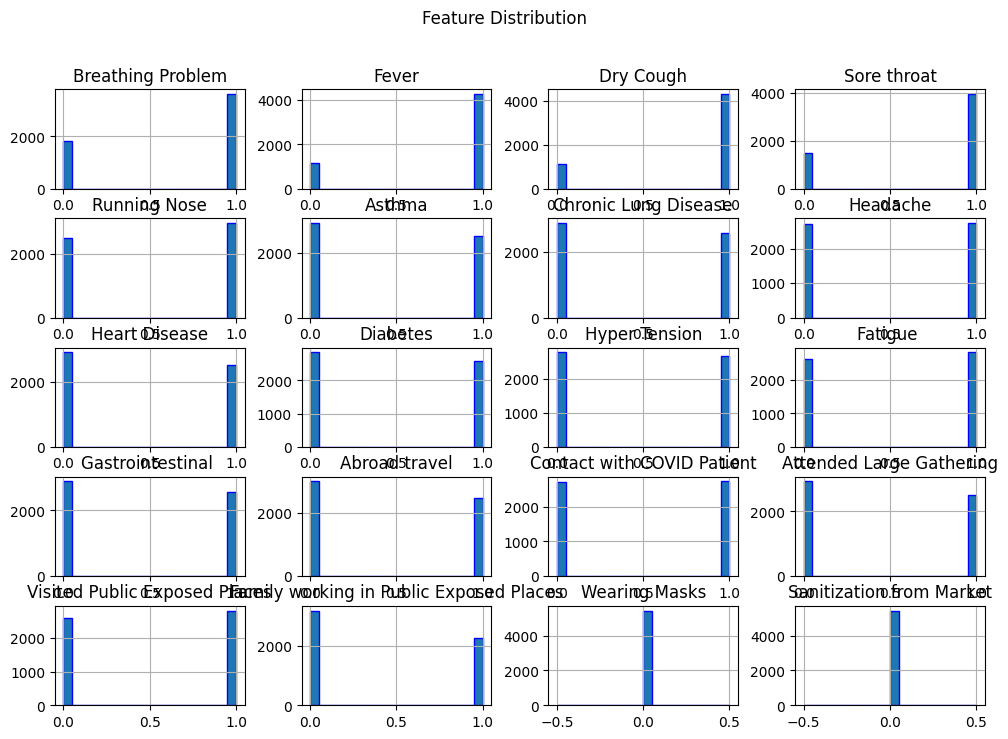

In [32]:
plt.figure(figsize=(20,20))
df.hist(figsize=(12,8),bins=20,edgecolor='b')
plt.suptitle('Feature Distribution')
plt.show()

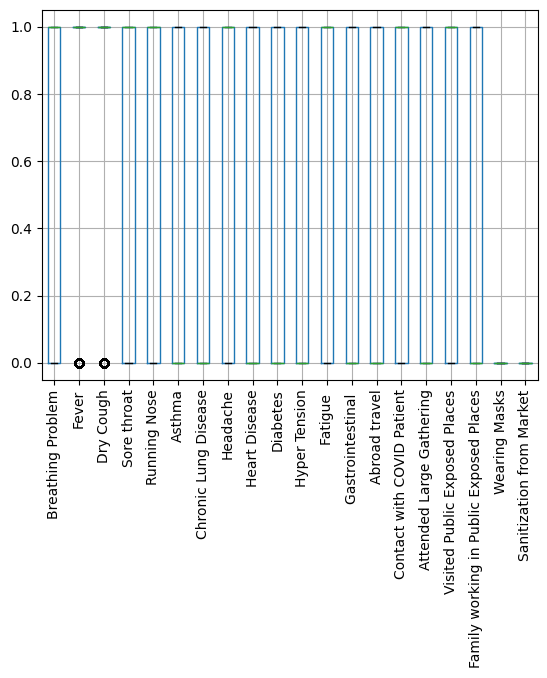

In [33]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

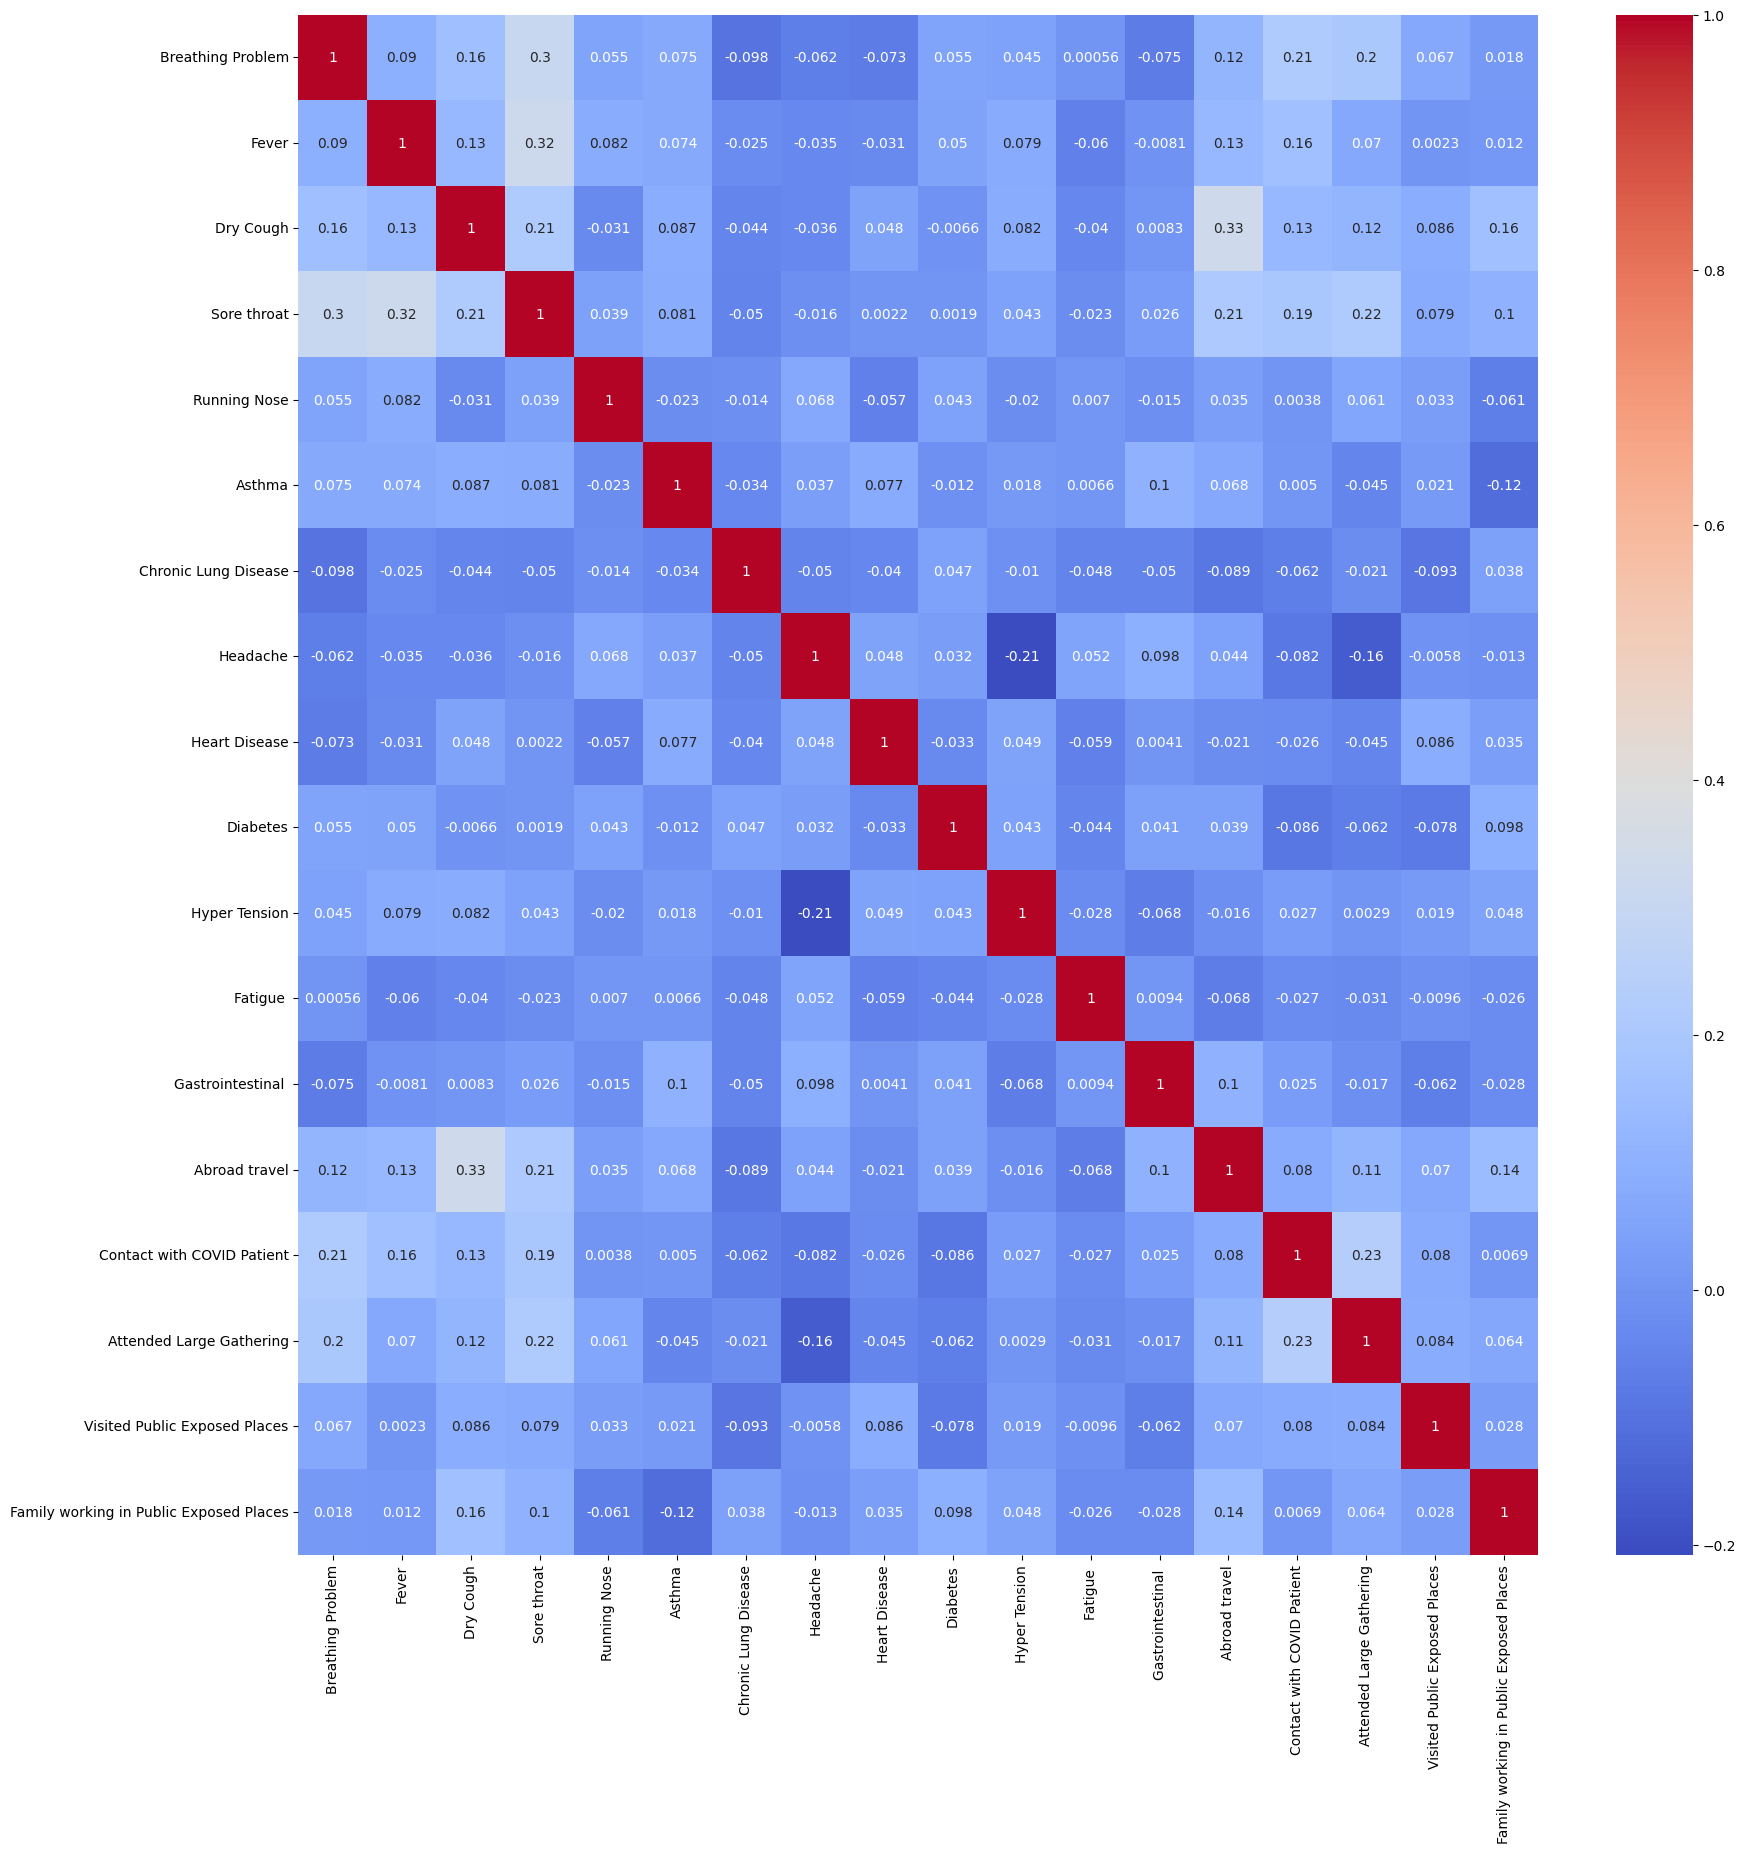

In [47]:
plt.figure(figsize=(20,20))
col = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places']
corr = df[col].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
np.sqrt(len(y_test))

np.float64(32.96968304366907)

In [43]:
model = KNeighborsClassifier(n_neighbors=33)
model.fit(X_train, y_train)
model

KNeighborsClassifier(n_neighbors=33)

In [44]:
y_pred = model.predict(X_test)
y_pred

array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [45]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy :{accuracy}")

Accuracy :96.22815087396505


In [46]:
new_data = [[1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]]
prediction = model.predict(new_data)
prediction[0]

'Yes'